In [ ]:
# Clustering : 
    # Group the examples based on their similarities. A good clustering is one that achieves : High within-cluster similarity , Low inter-cluster similarity. 
    # Unsupervised learning technique. Goal : Structure documents by topics. Structuring the search results. Clustering images. Market segmentation. Social Network Analysis.
    # Cluster defined by center & shape/spread. 
    # Requirements of a Good Clustering Algo : Scalability, ability to deal with different types of attributes, discovery of clusters with arbitrary shape, able to deal with noise and outliers, insensitive to order of input records, high dimensionality, interpretability and usability.


#K-MEANS :
    # First, initialize the cluster centers. Suppose we have k clusters and then assign a random center for each clusters,i.e you should define each clusters with its center.
    # Assign observartions to closest cluster center by similarity/distance. 
    # Then update cluster centers and repeat the whole process until it converges.
    # It is a coordinate descent algorithm and there is a chance to be stuck in local minima. It is not guaranteed that you will get the global minimum.
    # Besides that, the initial choice of the centroids may affect the result and cause to be stuck at some point.
    # How to initialize centroids ?
        # Multiple runs with random initial centroids. Then you can chhose the smallest result.
        # Use hierarchical clustering to determine initial centroids.
        # Kmeans++

# K-Means++ : 
    # Cluster centers should be far away from each other as much as possible. Chhose the center of first cluster and then calculate the distance to each data point. 
    # If data is far from the first center, then assign less weights to them and try to assign other clusters.
    # Computationally costly relative to random initialization but improve local optimum and run time.
    
# How many cluster ? can be ambiguos. How to choose k ?
    # The elbow method : SSE,sum of squared error. If k increases then SSE will decrease. pick k where the jump in objective is large. If k equals to n then SSE will be 0.
    # SSE = sum of square of each datapoint's distances to the centroid of its cluster. If you see that the improve in objective is not much, then you can pick that point to choose k value.
    
    # Cohesion : It looks the distance of datapoints within the cluster. Separation : It looks the distance of datapoints to other clusters.
    # Silhouette Coefficient : We will calculate this coefficient for each datapoint. For the cohesion part, calculate the average distance within cluster and it should be low. For separation, average distance of datapoints to other clusters and this should be high.
    # So, S(i) = (b(i)-a(i)) / (max(a(i),b(i))) where b(i) is for separation and a(i) is cohesion. If the score is close to 1, then it is good , if it is close to -1 then it is bad.
    # You will calculate the score for different k values and then you can choose the highest scored k.
    
# Limitation of K-Means :
    # You are defining clusters as centers and therefore, it assigns same importance to every datapoint.
    # Different shaped/oriented clusters can cause difficulties. Since it does not care about covariant matrix, it does not understand the orientation.
    # It does an hard assignment. A point either totally belongs to a cluster or not at all. no notion of soft/franctional assignment.
    # Suppose you have to clusters and and one is inside the others. Since the centers of clusters will be the same, it will not be able to separate clusters. Therefore, you need to use feature transformations like kernel kmeans.
    

# K-MEDOIDS :
    # If you have outliers in your dataset then K-MEANS can assign clusters' centers to wrong points and cant handle with that. 
    # It is similat to K-MEANS exept when fitting the centers, we restrict ourselves to data itself.
    # While fitting the centers, instead of looking at the average distance of data's in clusters, it directly tries to find the center data point and assign it as a center.
    # It converges always and different starting points can give different final answers. Computationally harder. 
    # It could be more robust to noise and outliers as compared to K-MEANS because it minimizes the sum of general pairwise dissimilarities instead of sum of squared Euclidean distances.
    
    
    

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles


<AxesSubplot:>

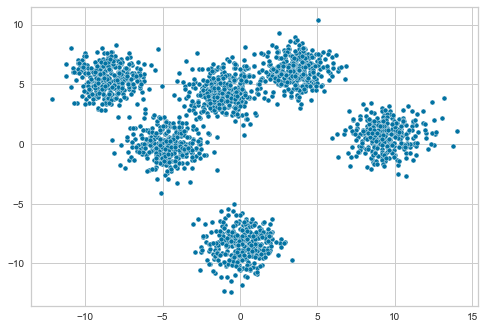

In [2]:
X, _ = make_blobs(n_samples = 2000,n_features = 2, centers = 6, cluster_std = 1.2,random_state = 7) 

sns.scatterplot(x = X[:,0], y = X[:,1], s=25) 


In [3]:
kmeans = KMeans(n_clusters = 6)

kmeans.fit(X)

KMeans(n_clusters=6)

In [4]:
kmeans.cluster_centers_

array([[-4.69116792, -0.11752535],
       [ 3.62538919,  6.16978986],
       [ 0.04116813, -8.43601131],
       [ 9.4484156 ,  0.72201741],
       [-8.49447143,  5.49909033],
       [-1.10574263,  4.37805412]])

In [5]:
kmeans.labels_

array([3, 1, 3, ..., 0, 3, 1], dtype=int32)

<AxesSubplot:>

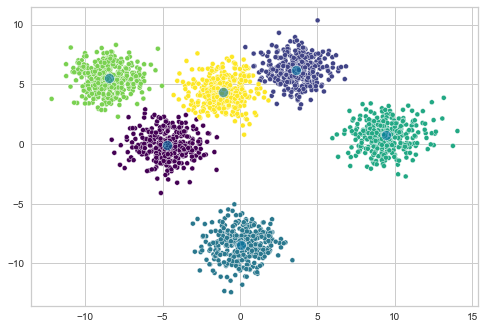

In [6]:
sns.scatterplot(x = X[:,0] ,y = X[:,1], s = 25, c = kmeans.labels_, cmap = "viridis") 
sns.scatterplot(x =kmeans.cluster_centers_[:,0] ,y = kmeans.cluster_centers_[:,1], s = 100, alpha = 0.6) 

In [7]:
### ELBOW METHOD TO CHOOSE K

In [8]:
n_clusters_range = np.arange(1,10)

intra_cluster_arr = [] 

for k in n_clusters_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    intra_cluster_arr.append(kmeans.inertia_) 


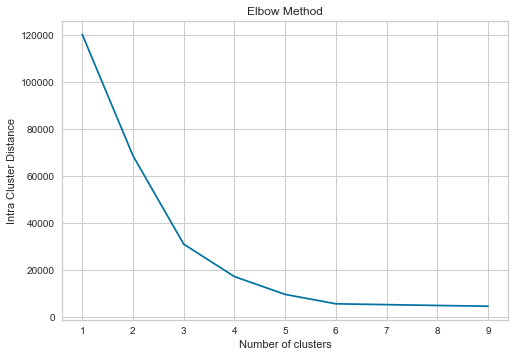

In [9]:
plt.plot(n_clusters_range,intra_cluster_arr)
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.title("Elbow Method")
plt.show() # By looking at the change in intra cluster distance, you can choose choose k as 3 or 4.


In [10]:
#### SILHOUETTE SCORE

In [11]:
np.arange(2,11)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
for n_cluster in [2,3,4,5,6,7,8,9,10]:
    model = KMeans(n_clusters = n_cluster)
    model.fit(X)
    cluster_labels = model.labels_

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_cluster, "Avg silhouette_score is = ", silhouette_avg) 


For n_clusters =  2 Avg silhouette_score is =  0.4676807423705406
For n_clusters =  3 Avg silhouette_score is =  0.5571791411006792
For n_clusters =  4 Avg silhouette_score is =  0.5912683136452409
For n_clusters =  5 Avg silhouette_score is =  0.6316838854326906
For n_clusters =  6 Avg silhouette_score is =  0.6616776115071495
For n_clusters =  7 Avg silhouette_score is =  0.6027530951200742
For n_clusters =  8 Avg silhouette_score is =  0.5329472342726069
For n_clusters =  9 Avg silhouette_score is =  0.48187872683872385
For n_clusters =  10 Avg silhouette_score is =  0.40827297602064583


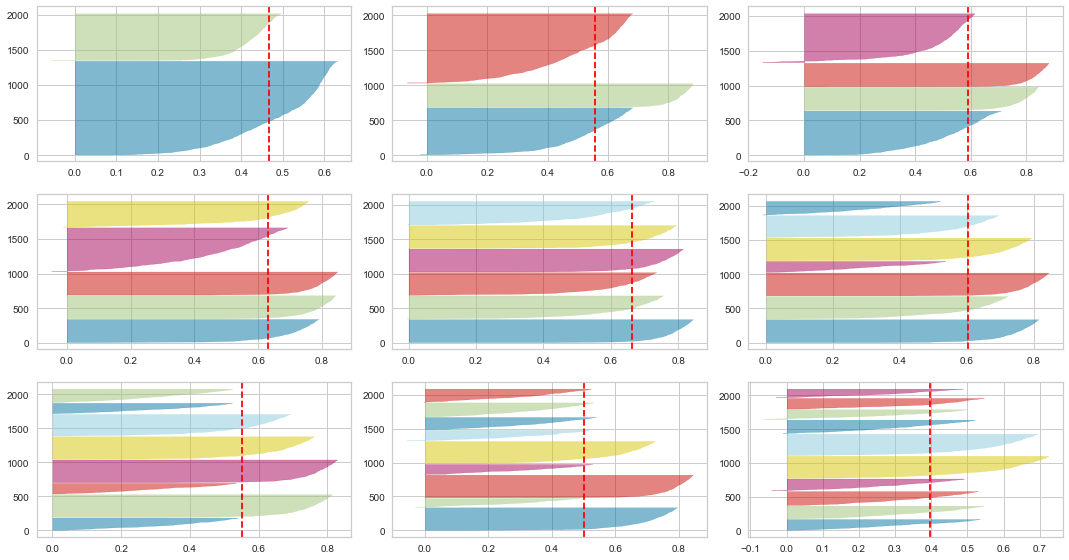

In [31]:
fig,ax = plt.subplots(3,3,figsize = (15,8)) 

fig.tight_layout()

cluster_size_arr = np.arange(2,11)

for _id, num_cluster in enumerate(cluster_size_arr):
    model = KMeans(n_clusters = num_cluster)
    current_ax = ax[_id // 3][_id %3]
    #current_ax.set_title("n_clusters = ",str(num_cluster))
    
    visualizer = SilhouetteVisualizer(model,ax = current_ax, colors = "yellowbrick")
    visualizer.fit(X)

In [33]:
#### IF WE HAVE DIFFERENT CLUSTERS SHAPED LIKE CRESCENT, KMEANS WORKS POORLY.

In [38]:
X, _ = make_moons(2000,random_state = 0, noise = 0.05)

<AxesSubplot:>

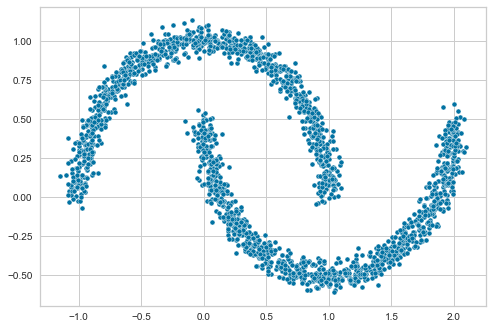

In [39]:
sns.scatterplot(x = X[:,0],y = X[:,1], s = 25)

In [40]:
kmeans = KMeans(n_clusters = 2)

kmeans.fit(X)

KMeans(n_clusters=2)

In [42]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

<AxesSubplot:>

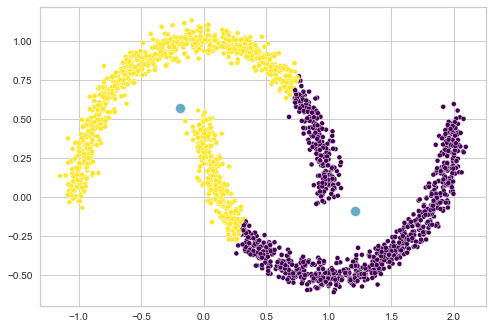

In [43]:
sns.scatterplot(x = X[:,0], y = X[:,1], c= labels, s = 25, cmap = "viridis")
sns.scatterplot(x =centers[:,0],y = centers[:,1], s = 100, alpha = 0.6)


In [ ]:
### TO FIX IT WE CAN USE SPECTRAL CLUSTERING METHOD.
 # It creates graph with knn according to connectivities. Then you partition that graph. It partitionals the graph by looking to the connectivities on each point.  
    

In [45]:
model = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors")

model.fit(X)

/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [46]:
labels = model.labels_

<AxesSubplot:>

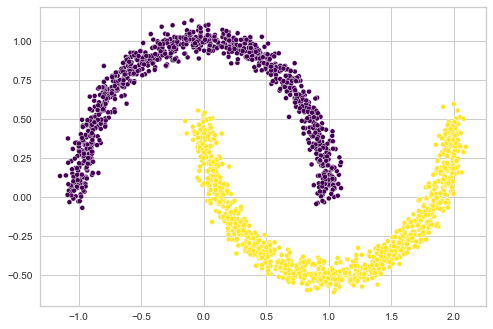

In [47]:
sns.scatterplot(x = X[:,0], y = X[:,1], c = labels, s =25,cmap = "viridis")

In [ ]:
### IF WE HAVE 2 CLUSTERS WITH SAME CENTER THEN KMEANS DOES WORK POORLY.

In [58]:
X, _ = make_circles(n_samples = 2000, random_state = 0,noise = 0.05,factor = 0.5) # factor is used to reduce the radius of the inner circled. If you use 1 then it becomes the same with outer circle.



<AxesSubplot:>

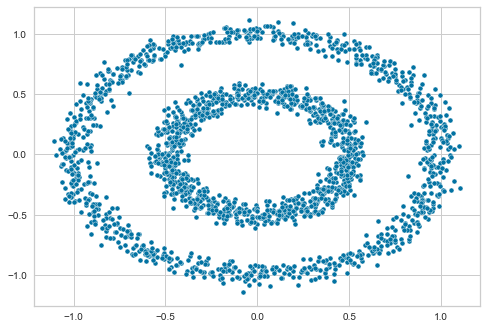

In [59]:
sns.scatterplot(x = X[:,0],y = X[:,1], s = 25)

In [60]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [62]:
labels = kmeans.labels_

centers = kmeans.cluster_centers_

<AxesSubplot:>

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


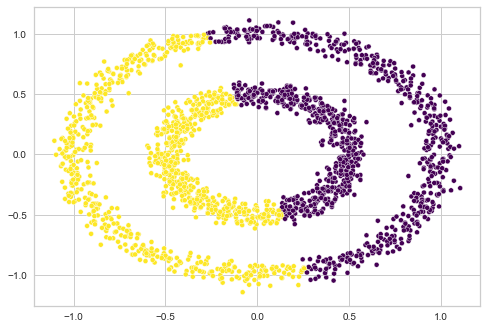

In [63]:
sns.scatterplot(x = X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

sns.scatterplot( c = centers[:,0], y = centers[:,1], s = 100, alpha = 0.6)

In [64]:
model = SpectralClustering(n_clusters = 2,affinity = "nearest_neighbors")

model.fit(X)

labels = model.labels_

/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

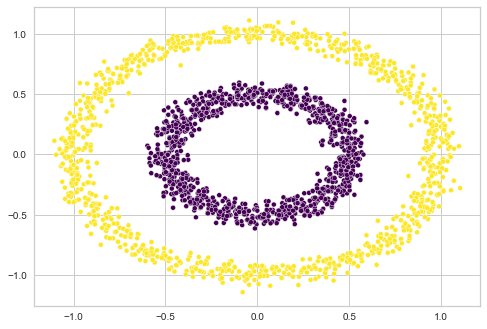

In [65]:
sns.scatterplot(x = X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")